# Question 1 :The Mystery Polynomial [Programming Question]: 
You have been given a dataset in regression_data.csv. This data was generated from a noisy polynomial function with a degree of 6 or less. Your task is to find this function. 

**Instructions**: 
- (a) Load the data and split it into an 80% training set and a 20% testing set. 
- (b) Build and evaluate six polynomial regression models with degrees n = 1 through n = 6. 
- (c) For each model, calculate and record error metrics of your choice (e.g., Mean Squared Error, R-squared) on both the training and testing sets. 
- (d) Report the most likely polynomial function that generated the data, along with your justification based on the error metrics. 
*Note*: Increasing the degree of the polynomial will obviously reduce training error, so do not rely solely on training errors for model selection.


In [32]:
# Solution 1 a. Load the data and split it into training and testing sets
import pandas as pd 
from sklearn.model_selection import train_test_split

data= pd.read_csv('../../../data/ml_assignment_data/regression_data.csv')
x= data[['x']] # x should be a 2d array
y= data['y'] # scikit learn expects y to be a 1d array
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


In [33]:
# Solution 1 b. Build and evaluate the six degree polynomial regression models
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results=[]

for degree in range(1,7):
    poly_feature= PolynomialFeatures(degree=degree)
    x_train_poly= poly_feature.fit_transform(x_train)
    x_test_poly= poly_feature.transform(x_test)

    model= LinearRegression()
    model.fit(x_train_poly, y_train)

    y_train_pred= model.predict(x_train_poly)
    y_test_pred= model.predict(x_test_poly)

    train_mse= mean_squared_error( y_train, y_train_pred)
    test_mse= mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train,y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({
        'degree':degree,
        'train_mse':train_mse,
        'test_mse':test_mse,        
        'train_r2':train_r2,
        'test_r2':test_r2
    })
     

results_df=pd.DataFrame(results)
print(results_df)



   degree    train_mse     test_mse  train_r2   test_r2
0       1  1336.151033  1455.196734  0.399475  0.411857
1       2  1314.652379  1319.714597  0.409138  0.466615
2       3   739.297683   550.450605  0.667727  0.777526
3       4   499.378317   396.801428  0.775557  0.839626
4       5   498.240131   405.703777  0.776069  0.836028
5       6   498.128848   407.700218  0.776119  0.835221


The above table summarizes the performance of polynomial regression models with degree 1 through 6. 
- We need to find the **low mean squared error** and **high R-square** in test data set. 
- With increase in degree test mse decreses but starts increasing at degree 5, thus **degree 4** is shuited for **test MSE**
- With increase in the degree **test R2 increases** but starts decreasing after **degree 4**  thus sweet spot for the this polynomial is degree 4.
- As you increase the degree of the polynomial, the model becomes more flexible and can fit the training data better, so the training error will always decrease (or stay the same).
- However, a very high-degree polynomial can start to "memorize" the training data (overfitting), capturing noise instead of the true pattern.
- Therefore, you should also look at the test error (or validation error) to select the best model. The best degree is where the test error is lowest, not where the training error is lowest.

# Question 2 : KNN with Cross-Validation [Programming Question]:
You are given a dataset point KNN.csv. Each row corresponds to a 2D point with coordinates (x1, x2) and a class label (0 or 1).

**Your tasks are:**
- (a) Load the dataset from point KNN.csv, and split it into 80% training and 20% testing sets.
- (b) Implement the K-Nearest Neighbors (KNN) algorithm for classification.
- (c) Use 5-fold cross-validation on the training set to select the optimal number of neighbors k. The aim is to avoid both high bias (underfitting) and high variance (overfitting).
- (d) Report the following:
    - a. The value of k selected by cross-validation.
    - b. Training accuracy, validation accuracy, and test accuracy.

In [3]:
# Solution2 a. Loading here the dataset and splitting it into train and test sets
import pandas as pd
from sklearn.model_selection import train_test_split

df= pd.read_csv('../../../data/ml_assignment_data/points_KNN.csv')
x= df.drop('label',axis=1)
y= df['label']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(f" x_train shape:{x_train.shape}, x_test shape:{x_test.shape}, y_train shape:{y_train.shape[0]}, y_test shape:{y_test.shape}")

 x_train shape:(240, 2), x_test shape:(60, 2), y_train shape:240, y_test shape:(60,)


In [16]:
# Solution2 b. Fitting a KNN model to the training set and evaluating its performance on the test set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn= knn_model.predict(x_test)
print("training score:", knn_model.score(x_train, y_train))
print("test score:", knn_model.score(x_test, y_test))
print(f"Accuracy score for KNN model: {accuracy_score(y_test, y_pred_knn)}")
print("Classification report for KNN model:")
print(classification_report(y_test, y_pred_knn))
print("Confusion matrix for KNN model:")
print(confusion_matrix(y_test, y_pred_knn))

print("First 10 true labels:")
print(f"First 10 true labels:{y_test[:10].values}")
print(f"First 10 predictions:{y_pred_knn[:10]}")

training score: 0.9166666666666666
test score: 0.9166666666666666
Accuracy score for KNN model: 0.9166666666666666
Classification report for KNN model:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.91      0.94      0.93        34

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60

Confusion matrix for KNN model:
[[23  3]
 [ 2 32]]
First 10 true labels:
First 10 true labels:[1 1 1 1 1 0 1 0 1 1]
First 10 predictions:[1 1 1 1 1 0 1 0 1 1]


In [ ]:
# Solution 2 c. Using cross-validation to select the optimal value of k (from 1 to 20) based on accuracy. 
# Report the optimal value of k and the corresponding standard deviation. Also report the worst value of k and its standard deviation.
from sklearn.model_selection import cross_val_score

k_range= range(1,21)
cv_scores= []
cv_stds= []

for k in k_range:
    knn_model =KNeighborsClassifier(n_neighbors=k)
    cv_score= cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(cv_score.mean())
    cv_stds.append(cv_score.std())

optimal_k= k_range[cv_scores.index(max(cv_scores))]
optimal_k_std= cv_stds[k_range[cv_scores.index(max(cv_scores))]]

worst_k= k_range[cv_scores.index(min(cv_scores))]
worst_k_std= cv_stds[k_range[cv_scores.index(min(cv_scores))]]
                       
print(f"Optimal number of neighbors (k): {optimal_k}")
print(f"Standard deviation of optimal k: {optimal_k_std}")
print(f"Worst number of neighbors (k): {worst_k}")
print(f"Standard deviation of worst k: {worst_k_std}")  

Optimal number of neighbors (k): 6
Standard deviation of optimal k: 0.03385016001931652
Worst number of neighbors (k): 1
Standard deviation of worst k: 0.04448782605013046


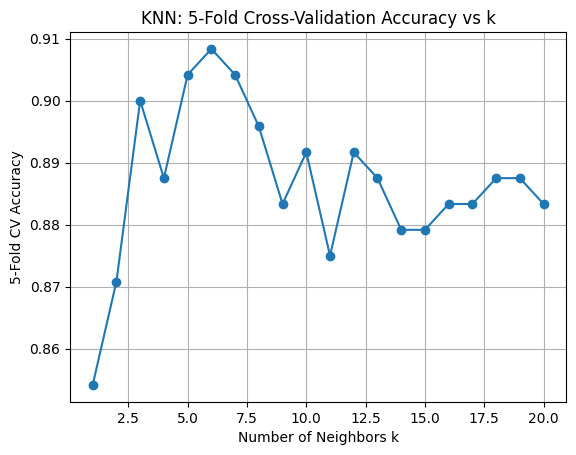

In [8]:
# Plot k vs. cross-validation accuracy
import matplotlib.pyplot as plt

plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('5-Fold CV Accuracy')
#plt.xticks(k_range)
plt.title('KNN: 5-Fold Cross-Validation Accuracy vs k')
plt.grid()
plt.show()

In [15]:
# Solution2 d. Refit the KNN model using the optimal k value and evaluate its performance on the test set. 
# Report the accuracy, confusion matrix, and classification report.

# a. The value of k selected by cross-validation
print(f"Optimal number of neighbors (k): {optimal_k}")

# b. Training accuracy, validation (cross-validation) accuracy, and test accuracy

# Training accuracy (fit and predict on training set)
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(x_train, y_train)
train_acc = knn_best.score(x_train, y_train)

# Validation accuracy (mean cross-validation score)
val_acc = max(cv_scores)

# Test accuracy (predict on test set)
test_acc = knn_best.score(x_test, y_test)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Validation (CV) accuracy: {val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"First 10 predictions:{y_pred_knn[:10]}")

Optimal number of neighbors (k): 6
Training accuracy: 0.9083
Validation (CV) accuracy: 0.9083
Test accuracy: 0.9167
First 10 predictions:[1 1 1 1 1 0 1 0 1 1]


The **training accuracy** is **not higher** than **validation accuracy** that means model is not overfitting and both accuracies training and validation are high that means model is not underfitting. 
Thus 6-KNN is likely a good choice, as it balances the bian and variance well for the give data set. 

# Question 3: Using Python (scikit-learn)
generate a synthetic regression dataset with n = 200 observations and p = 5 predictors.
- (a) Fit a linear regression model (parametric, inflexible).
- (b) Fit a decision tree regressor (non-parametric, flexible).
- (c) Compare their test mean squared errors (MSE) on a held-out test set.
- (d) Plot the training error and test error of the decision tree model as a function of tree depth.
- (e) Using the plot, explain how the bias–variance trade-off is illustrated. At what depth
do you see signs of overfitting?

In [ ]:
# Solution 3 (A. Linear Regression)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x,y = make_regression(n_samples=100, n_features=5, noise=20, random_state=42)

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

model= LinearRegression()  
model.fit(x_train,y_train) # fit method automatically adjusts the weights and bias to optimize the model

# Predicting
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)


train_mse= mean_squared_error(y_train,y_train_pred)
test_mse= mean_squared_error(y_test,y_test_pred)

print(f"Leaner regression Train MSE:{train_mse}");
print(f"Leaner reqgresssion Test MSE:{test_mse}")




Leaner regression Train MSE:326.3182445811751
Leaner reqgresssion Test MSE:453.79201272243125


Train MSE is lesser than test MSE that means, model does not generalizes well on unseen data that is happending due to noise=20. 


In [2]:
from sklearn.metrics import r2_score

# Calculate R2 (coefficient of determination)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Adjusted R2
n_train = len(y_train)
n_test = len(y_test)
p = x_train.shape[1]

train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print(f"Train R2: {train_r2:.4f}, Adjusted Train R2: {train_adj_r2:.4f}")
print(f"Test R2: {test_r2:.4f}, Adjusted Test R2: {test_adj_r2:.4f}")



Train R2: 0.9830, Adjusted Train R2: 0.9819
Test R2: 0.9781, Adjusted Test R2: 0.9703


In [5]:
## Solution 3  (B. Decision Tree Regressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fit a decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train,y_train)

# predicting 
y_train_pred_tree= tree_model.predict(x_train)
y_test_pred_tree = tree_model.predict(x_test)

# Calculate MSE
train_mse_tree= mean_squared_error(y_train, y_train_pred_tree)
test_mse_tree= mean_squared_error(y_test, y_test_pred_tree)

print(f"Decision tree train MSE:{train_mse_tree}")
print(f"Decision tree test MSE:{test_mse_tree}")


Decision tree train MSE:0.0
Decision tree test MSE:7120.874205203296


In [ ]:
# Solution 3 (C. compare the test MSE of both models)
print(f"Linear regression test MSE: {test_mse}")
print(f"Decision tree test MSE: {test_mse_tree}")

# the model with the lower test MSE is better which is linear regression in this case,
# linear regression generalises well on unseen data

Linear regression test MSE: 453.79201272243125
Decision tree test MSE: 7120.874205203296


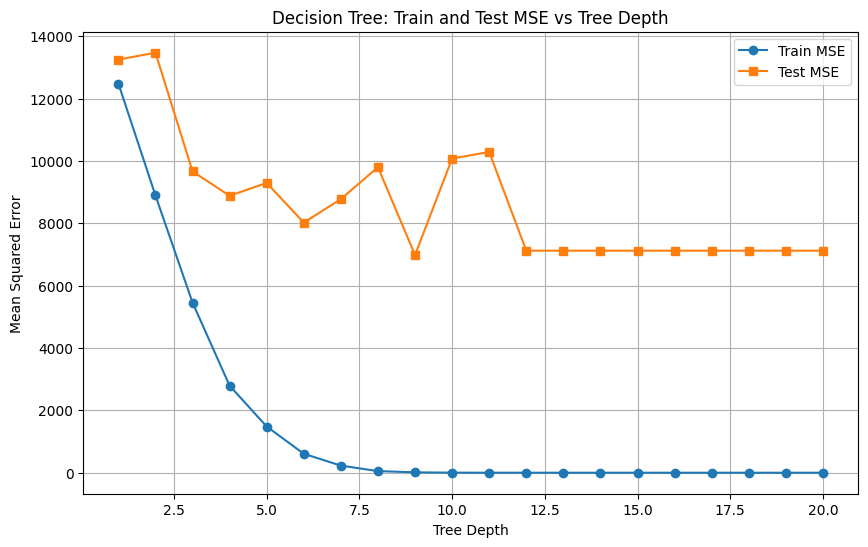

In [11]:
## Solution 3 ( D. Plot the training error and test error of the decision tree model 
# as a function of tree depth).


import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

max_depth= range(1,21)
train_errors= []
test_errors=[]

for depth in max_depth:
    tree_model= DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(x_train, y_train)
    y_train_pred= tree_model.predict(x_train)
    y_test_pred= tree_model.predict(x_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10,6))
plt.plot(max_depth, train_errors, label='Train MSE', marker='o')
plt.plot(max_depth, test_errors, label='Test MSE', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree: Train and Test MSE vs Tree Depth')
plt.legend()
plt.grid()
plt.show()  

# Solution 3 (E. bias and variance trade off)
- Error is very high when tree depth is low, with increase in the tree depth train MSE reduces to almost 0. MSE being 0 means model memorises the train data but does not generalizes well on test data. 
- When depth is low model has high bias, and does not remember anything from the data. The blue line (train MSE) aroud 9th depth is almost 0 but orange line fluctuates after that i.e model does not predicts well on unseen data. 
- at low depths bias is high and variance is low, i.e model is simple and does not know the underlying pattern in the data. 
- at high depth bias is low and variance is high, i.e model tries to remember everything but does not generalizes well. 
- In above graph at depth **9** is the sweet spot where model balances bias and variance trade off. 